In [1]:
import librosa
import numpy as np
from scipy.fftpack import dct

In [2]:
# Load the audio signal
audio_file = r"C:\Users\VIET HOANG - VTS\Desktop\place to be split\output_audio.wav_1.wav"
y, sr = librosa.load(audio_file, sr=None)

In [3]:
print(sr)

44100


In [4]:
# Step 1: Pre-emphasis
pre_emphasis_coeff = 0.97
y_filt = librosa.effects.preemphasis(y, coef=pre_emphasis_coeff)

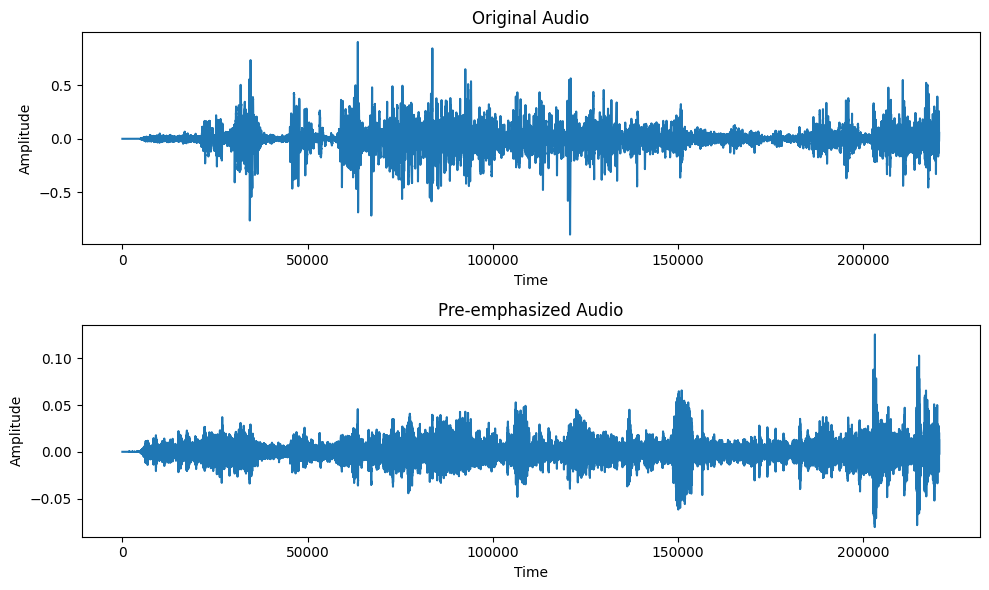

In [5]:
import matplotlib.pyplot as plt
# Plot the original audio waveform
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].plot(y)
axs[0].set_title('Original Audio')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')

# Plot the pre-emphasized audio waveform
axs[1].plot(y_filt)
axs[1].set_title('Pre-emphasized Audio')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
import librosa
def evaluate(frames):
    # Calculate the average energy of the frames
    frame_energies = np.sum(np.square(frames), axis=1)
    avg_energy = np.mean(frame_energies)

    return avg_energy

In [11]:
import librosa

audio_duration = 5  # Duration of the audio in seconds
sr = librosa.get_samplerate(audio_file)  # Get the sampling rate of the audio

# Define a range of frame lengths and hop lengths to explore
frame_lengths = [0.020, 0.025, 0.030]  # e.g., 20 ms, 25 ms, 30 ms
hop_lengths = [0.50, 0.60, 0.75]  # e.g., 50%, 60%, 75% of the frame length

best_frame_length = None
best_hop_length = None
best_score = float('-inf')

# Iterate over the combinations of frame lengths and hop lengths
for frame_length in frame_lengths:
    for hop_length_ratio in hop_lengths:
        # Calculate the hop length based on the frame length and ratio
        hop_length = frame_length * hop_length_ratio

        # Convert frame length and hop length to samples
        frame_length_samples = int(frame_length * sr)
        hop_length_samples = int(hop_length * sr)

        # Generate the frames using the current frame length and hop length
        frames = librosa.util.frame(y_filt, frame_length=frame_length_samples, hop_length=hop_length_samples)

        # Evaluate the quality or performance of the frames (your evaluation metric)
        score = evaluate(frames)

        # Keep track of the best frame length and hop length based on the evaluation score
        if score > best_score:
            best_score = score
            best_frame_length = frame_length_samples
            best_hop_length = hop_length_samples

# Use the best frame length and hop length for further processing
frames = librosa.util.frame(y_filt, frame_length=best_frame_length, hop_length=best_hop_length)

In [ ]:
# # Step 2: Frame blocking
# frame_length = 0.025  # 25 ms
# hop_length = 0.010    # 10 ms
# frame_length_samples = int(frame_length * sr)
# hop_length_samples = int(hop_length * sr)
# frames = librosa.util.frame(y_filt, frame_length= frame_length_samples, hop_length= hop_length_samples)

In [12]:
# Step 3: Windowing

import numpy as np

frame_length = len(frames)
output = frames*np.hamming(frame_length)[:, np.newaxis]
frames = output



In [13]:
def optimal_fft_length(window_length: int) -> int:
    return 2 ** int(np.ceil(np.log2(window_length)))

In [14]:
# Step 4: Fast Fourier Transform (FFT)
fft_size = optimal_fft_length(len(frames))
spectrogram = np.abs(np.fft.fft(frames, n=fft_size))

In [15]:
# Step 5: Mel frequency wrapping
n_mels = 68
mel_spec = librosa.feature.melspectrogram(sr=sr, S=spectrogram, n_mels=n_mels)

In [16]:
# Step 6: Discrete Cosine Transform (DCT)
n_mfcc = 216
mfcc = dct(np.log(mel_spec), type=2, axis=1, norm='ortho')[:, :n_mfcc]

In [17]:
# Print the shape of MFCC features
print(mfcc.shape)

(68, 216)


In [18]:
max_mfcc=np.max(mfcc, axis=1)
mins, maxs=np.min(max_mfcc), np.max(max_mfcc)
scaled_mfcc=(max_mfcc-mins)/(maxs-mins)

In [19]:
print(scaled_mfcc)

[0.41664621 0.65749339 0.68419129 0.46165167 0.55105408 0.52386209
 0.64726715 0.6344741  1.         0.61570963 0.39531714 0.89982888
 0.78557103 0.60086365 0.5205846  0.61010971 0.48132563 0.34405891
 0.58477799 0.39126968 0.21244923 0.36669435 0.48344978 0.1662679
 0.27906399 0.51219733 0.35947099 0.33214994 0.46465876 0.70239747
 0.65506488 0.33832649 0.19974033 0.42293089 0.11940282 0.24035291
 0.26231108 0.38866388 0.19154519 0.54829462 0.63619964 0.65460557
 0.45902131 0.11247962 0.08861881 0.05332252 0.1749949  0.16772601
 0.09055647 0.06805471 0.08586875 0.10467979 0.78245268 0.06912404
 0.23805617 0.40530148 0.34366437 0.31019531 0.20409527 0.3105315
 0.27611316 0.26473783 0.4440236  0.         0.07481866 0.01807281
 0.35230339 0.24082065]


In [20]:
print(len(scaled_mfcc))

68
